# Credit card fraud detection

The dataset that we use is the credit card transaction dastaset. We do a preliminary Exploratory Data Analysis (EDA), and then try to spot duplicate transactions. These are identified as transactions which are:


*   Reversed: a purchase is followed by reversal
*   Multiple-swipe: a vendor accidently charges a customer's card multiple times within a short span of time

The goal is to identify this and observe the pattern, if any. 

Then the next goal is to build a model that can determine if the transaction will be fraudulent or not. We are using different models (though basic ones) for modeling and analysis. 



# Importing the libraries

In [ ]:
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve, accuracy_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, neural_network
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scipy.special import softmax
from scipy.special import expit

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Notebook setup : mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Run this cell once in every instance : To change the current directory to the data set folder

In [ ]:
path = os.getcwd()
path += '/DS'
os.chdir(path)
print(os.getcwd())

/content/DS


## Unzipping the data file

In [ ]:
!unzip transactions.zip

Archive:  transactions.zip
replace transactions.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: transactions.txt        


# Exploring the dataset

In [ ]:
filename = 'transactions.txt'
with open(filename) as f:
    data = pd.DataFrame(json.loads(line) for line in f)

## Analysing the data

### First look of dataset (first 5 rows)

In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [ ]:
# Make a dictionary of columns and numbers
columns = {}
for i,cols in enumerate(data.columns):
    columns[i] = cols

print("Columns in the dataset:")
for k,v in columns.items():
    print(k, ":", v)

Columns in the dataset:
0 : accountNumber
1 : customerId
2 : creditLimit
3 : availableMoney
4 : transactionDateTime
5 : transactionAmount
6 : merchantName
7 : acqCountry
8 : merchantCountryCode
9 : posEntryMode
10 : posConditionCode
11 : merchantCategoryCode
12 : currentExpDate
13 : accountOpenDate
14 : dateOfLastAddressChange
15 : cardCVV
16 : enteredCVV
17 : cardLast4Digits
18 : transactionType
19 : echoBuffer
20 : currentBalance
21 : merchantCity
22 : merchantState
23 : merchantZip
24 : cardPresent
25 : posOnPremises
26 : recurringAuthInd
27 : expirationDateKeyInMatch
28 : isFraud


### Columns and their datatypes

In [ ]:
print("Summary of the data")
print(data.info(verbose=True))
print("Number of elements in the data: ", data.size)

Summary of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate         

There are 786,363 entries in the dataset, with 29 columns. 

There is no null value from this information but we will verify this in subsequent cells if any of the columns contains empty values or not. According to this information, every column contains a value and the total entries in the data are 29*786,363 = 22,804,527. 

The dataset contains 4 columns which have numerical values, 3 columns with boolean values while others are of pandas "object" data type, which is python string datatype mainly used for text. Hence, we can summarize the datatypes of the data as : 

*   3 columns of boolean type
*   4 columns of numerical (float) type
*   22 columns of textual (pandas object/python string) type



In [ ]:
print("Memory usage by each column (in Bytes)")
print(data.memory_usage(index=False))

Memory usage by each column (in Bytes)
accountNumber               6290904
customerId                  6290904
creditLimit                 6290904
availableMoney              6290904
transactionDateTime         6290904
transactionAmount           6290904
merchantName                6290904
acqCountry                  6290904
merchantCountryCode         6290904
posEntryMode                6290904
posConditionCode            6290904
merchantCategoryCode        6290904
currentExpDate              6290904
accountOpenDate             6290904
dateOfLastAddressChange     6290904
cardCVV                     6290904
enteredCVV                  6290904
cardLast4Digits             6290904
transactionType             6290904
echoBuffer                  6290904
currentBalance              6290904
merchantCity                6290904
merchantState               6290904
merchantZip                 6290904
cardPresent                  786363
posOnPremises               6290904
recurringAuthInd         

### Structure of data


We find the patterns in the dataset in the following cells. First, we find number of unique values in each column. 
Then we check again if the columns contain empty values and find the columns which do. This is done in the dictionary that is named as : "columns_list"

Next, we get the statistics of numerical columns. We get their total value, mean, std deviation, min, max and all quartiles. 


In [ ]:
 print("Number of unique values in each column:\n\n", data.nunique())

Number of unique values in each column:

 accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521916
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5246
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDat

We check for null/empty cells in the columns by the 'all' function which returns 'True' unless there at least one element within a series or along a Dataframe axis that is 'False' or equivalent (e.g. zero or empty).

Since we have Boolean containing columns in the dataset, we will have to carefully examine the results of this cell and exclude the Boolean columns from any further analysis.

In [ ]:
# To check if there are empty cells in the dataset
print(data.all()) 

accountNumber                True
customerId                   True
creditLimit                  True
availableMoney               True
transactionDateTime          True
transactionAmount           False
merchantName                 True
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode         True
currentExpDate               True
accountOpenDate              True
dateOfLastAddressChange      True
cardCVV                      True
enteredCVV                   True
cardLast4Digits              True
transactionType             False
echoBuffer                  False
currentBalance              False
merchantCity                False
merchantState               False
merchantZip                 False
cardPresent                 False
posOnPremises               False
recurringAuthInd            False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool


In [ ]:
count = 0
columns_list = {}
for i, val in enumerate(data.all()):
    # if the value of all() function is False
    # This means the cells can have values 'False'
    # zero and empty
    if not(val):
        # Considering only Non-Boolean columns
        if not isinstance(data[columns[i]][0], (np.bool_)):
            # Considering columns which do not have empty cells
            # i.e. excluding columns which had zero values by np.where
            # which returns the instances where the values in the columns
            # was empty (our condition). Hence, excluding those columns with
            # zero values and considering the ones with empty cells 
            if len(np.where(data[columns[i]] == '')[0]) != 0:
                columns_list[columns[i]] = len(np.where(data[columns[i]] == '')[0])
print("Columns with empty values: \n")
for key in columns_list:
    print(key, ' : ', columns_list[key])


Columns with empty values: 

acqCountry  :  4562
merchantCountryCode  :  724
posEntryMode  :  4054
posConditionCode  :  409
transactionType  :  698
echoBuffer  :  786363
merchantCity  :  786363
merchantState  :  786363
merchantZip  :  786363
posOnPremises  :  786363
recurringAuthInd  :  786363


In [ ]:
print("Statistical values of dataset:\n", data.describe())

Statistical values of dataset:
          creditLimit  availableMoney  transactionAmount  currentBalance
count  786363.000000   786363.000000      786363.000000   786363.000000
mean    10759.464459     6250.725369         136.985791     4508.739089
std     11636.174890     8880.783989         147.725569     6457.442068
min       250.000000    -1005.630000           0.000000        0.000000
25%      5000.000000     1077.420000          33.650000      689.910000
50%      7500.000000     3184.860000          87.900000     2451.760000
75%     15000.000000     7500.000000         191.480000     5291.095000
max     50000.000000    50000.000000        2011.540000    47498.810000


## Trying to get the non-string type of columns (these will act as features for machine learning models)

In [ ]:
float_cols = []
for col in data.columns:
    if isinstance (data[col][0], float):
        float_cols.append(col)

bool_cols = []
for col in data.columns:
    if isinstance (data[col][0], (np.bool_)):
        bool_cols.append(col)


non_obj_cols = float_cols + bool_cols

# Plot

## Histogram of transactions 

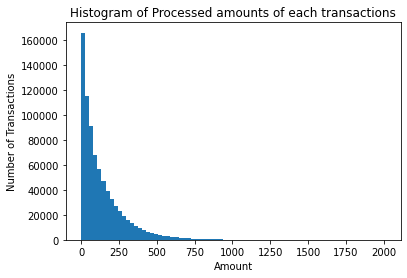

In [ ]:
plt.hist(data['transactionAmount'], bins=75)
plt.title('Histogram of Processed amounts of each transactions')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show()

We find from the histogram that the data is heavily skewed in favour of transactions with very less amounts. Infact, majority of the transaction amounts is less than 10. Because of such high values, we will further plot the histograms with different minimum transaction values.

Text(0.5, 1.0, 'Histogram of Processed amounts of each transactions > 1500')

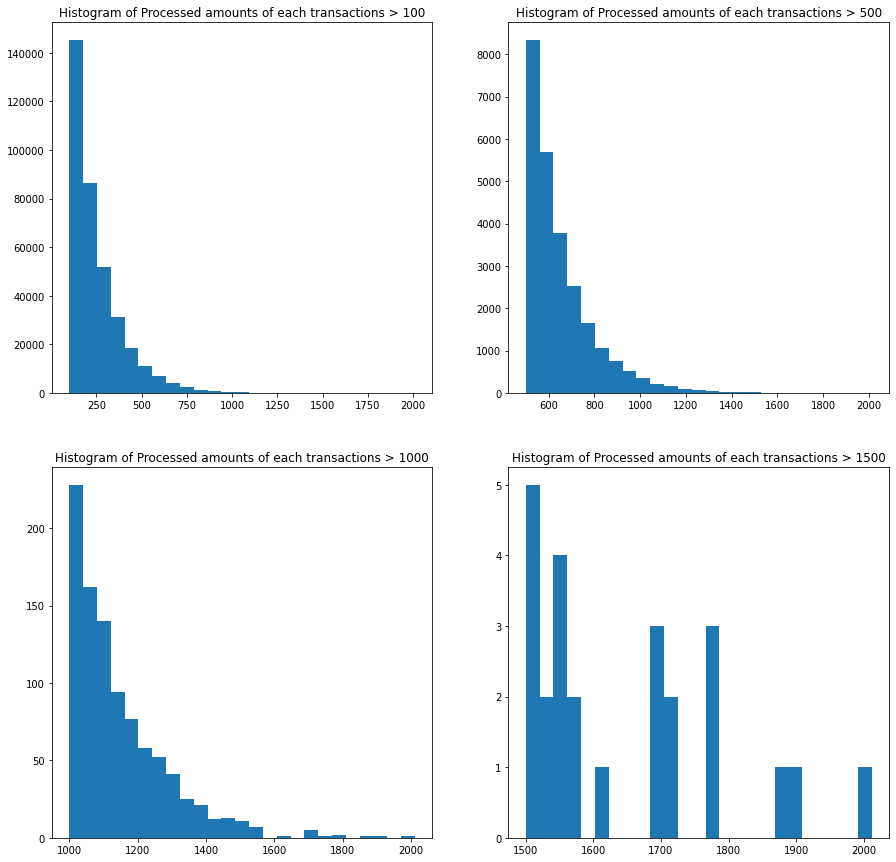

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))#, subplot_kw=dict(polar=True))
axs[0, 0].hist(data['transactionAmount'][data['transactionAmount']>100.0], bins=25)
axs[0, 0].set_title('Histogram of Processed amounts of each transactions > 100')
axs[0, 1].hist(data['transactionAmount'][data['transactionAmount']>500.0], bins=25)
axs[0, 1].set_title('Histogram of Processed amounts of each transactions > 500')
axs[1, 0].hist(data['transactionAmount'][data['transactionAmount']>1000.0], bins=25)
axs[1, 0].set_title('Histogram of Processed amounts of each transactions > 1000')
axs[1, 1].hist(data['transactionAmount'][data['transactionAmount']>1500.0], bins=25)
axs[1, 1].set_title('Histogram of Processed amounts of each transactions > 1500')

We see the similar pattern here. The transactions are more with lesser transaction amounts. This pattern is not valid when the transaction amount is over 1500 (from the 4th graph). The things we get to know from the histograms is that the transactions are Right skewed, i.e. the tail has positive skew towards right and peak of the histogram veers towards left.

This means that the Mode, is right most, followed by median and then mean (in most cases). Hence, in order to describe this kind of data statistically, it would be wise to present 2 of these metrics and preferable all 3 to get a sense of frequency and center of the data distributon. 

In [ ]:
def find_class_dist(data):
    isfraud_char = data['isFraud'].value_counts()
    print(isfraud_char)
    print("False: {}%".format(np.round(100*isfraud_char[0]/(np.sum(isfraud_char)),2)))
    print("True: {}%".format(np.round(100*isfraud_char[1]/(np.sum(isfraud_char)),2)))

#Data Wrangling : Duplicate transactions

## Reversal Transactions

From the preliminary EDA, we could see that "transactionType" column contains information about "REVERSAL" transactions and hence, we make a new dataset that contains transactions of "REVERSAL" nature.


Another way that this could be done is to keep track of 'availableMoney' in the original dataset, and flag a transaction as "REVERSAL" if the amount is added rather than subtracted for a particular transaction for an user. But this will be computationally expensive, given that we already have this flag in the dataset. Hence, we will use the flag.

In [ ]:
condition = (data['transactionType'] == 'REVERSAL') 
df_rev = data[condition]
df_rev.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,,299.02,,,,True,,,False,False
73,574788567,574788567,2500.0,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,01,auto,10/2022,2015-10-13,2015-10-13,579,579,4219,REVERSAL,,67.28,,,,True,,,False,False
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,01,online_retail,11/2024,2014-07-25,2014-07-25,205,265,9459,REVERSAL,,168.57,,,,False,,,False,False
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,,3632.59,,,,False,,,False,False
156,984504651,984504651,50000.0,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,12/2031,2015-07-27,2015-07-27,640,640,8332,REVERSAL,,8090.70,,,,True,,,False,False


In [ ]:
print("Total number of transactions : ", len(df_rev))
print("Total dollar amount from reversed transactions : ", np.sum(df_rev['transactionAmount']))

Total number of transactions :  20303
Total dollar amount from reversed transactions :  2821792.5


In [ ]:
find_class_dist(df_rev)

False    19966
True       337
Name: isFraud, dtype: int64
False: 98.34%
True: 1.66%


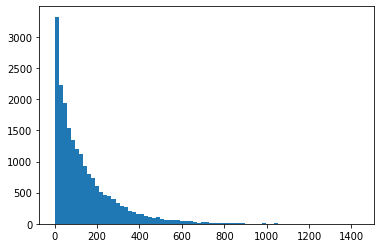

In [ ]:
plt.hist(df_rev['transactionAmount'], bins=75)
plt.show()

## Multi-swipe transactions

In order to solve this problem, firstly difference between the time of transactions is taken. This is because from the lineplot, the account numbers are arranged in the increasing order and hence the dataframe is arranged by the account numbers. 

After differencing, we find the transactions which fall within the specified threshold (if transactions happen within the threshold, then we consider them as multi swipe transactions) and then consider the edge case, wherein, the account numbers could be different but the transaction falls in the threshold zone. And once we have all the indices of the samples that we think are part of multi-swipe transactions, we copy them into another dataset.

In [ ]:
# Convert the transactionDateTime column to datetime datatype
data.transactionDateTime = pd.to_datetime(data.transactionDateTime)

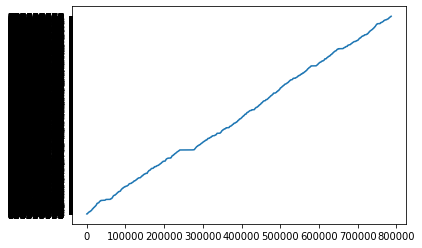

In [ ]:
# Plot the account numbers with respect to indices
plt.plot(data.index, data.accountNumber)
# The plot shows that the data is organised in increasing
# order of account numbers, but we will still have to consider
# the edge case, where time difference of 2 account numbers can
# be less than the threshold but their account numbers might be
# different.

In [ ]:
# Declare an empty dataset
df_ms = pd.DataFrame()
# Take difference of transaction date & time column
df_t = data.transactionDateTime.diff()
# Convert time to seconds
df_t = df_t.dt.total_seconds()/(60.0)

# Threshold time (in mins) to check for multiple swiping
threshold = 2.0
# Selecting those values which are within the threshold
df_t = (df_t[(df_t<threshold) & (df_t>0.0) == True])

# Edge case detection : if the account numbers of the current
# transaction and the previous transaction are not the same
# but the time difference value still satisfies the threshold 
# condition then need to delete the entry.
for i in df_t.index:
    if data.accountNumber[i] != data.accountNumber[i-1]:
        df_t = df_t.drop(index=i)
        
# copy from the main database, the values of transactions that
# are suspected to be a case of multi-swipe problem
df_ms = data.iloc[df_t.index]

print(df_ms)

       accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
133        984504651  984504651  ...                     False    False
263        984504651  984504651  ...                     False    False
281        984504651  984504651  ...                     False    False
339        984504651  984504651  ...                     False    False
358        984504651  984504651  ...                     False    False
...              ...        ...  ...                       ...      ...
785983     205026043  205026043  ...                     False    False
785984     205026043  205026043  ...                     False    False
786014     205026043  205026043  ...                     False    False
786024     205026043  205026043  ...                     False    False
786233     638498773  638498773  ...                     False    False

[17227 rows x 29 columns]


In [ ]:
print("Total number of transactions : ", len(df_ms))
print("Total dollar amount from reversed transactions : ", np.sum(df_ms['transactionAmount']))

Total number of transactions :  17227
Total dollar amount from reversed transactions :  2480445.14


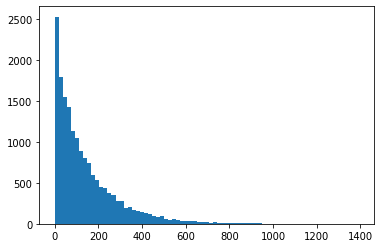

In [ ]:
plt.hist(df_ms['transactionAmount'], bins=75)
plt.show()

In [ ]:
find_class_dist(df_ms)

False    16912
True       315
Name: isFraud, dtype: int64
False: 98.17%
True: 1.83%


Both the kinds of transaction are almost similar in number ~ 20,000 but the value of transactions is higher in Reversal category than in Multi-Swipe category.

For both the kinds of transaction, the number of fraud transactions remain below 2%


They both follow the same right handed skewness as the original model.

#Modeling IsFraud Characteristics

## Checking class distribution of IsFraud

In [ ]:
isfraud_char = data['isFraud'].value_counts()
print(isfraud_char)
print("False: {}%".format(np.round(100*isfraud_char[0]/(np.sum(isfraud_char)),2)))
print("True: {}%".format(np.round(100*isfraud_char[1]/(np.sum(isfraud_char)),2)))


False    773946
True      12417
Name: isFraud, dtype: int64
False: 98.42%
True: 1.58%


The above numbers show that the data faces class imbalance problem. The "True" samples have 1.58% representation while the "False" have 98.42% presence in the dataset. This is shown in the bar chart below.

Hence, a simple classification statement, saying isFraud_test = 'False' will have a high accuracy of 98.42% because of this imbalance. This is not the case, because we will never be able to classify the 'True' case due to this imbalance.

Thus, we might have to incorporate different strategies to overcome this problem.

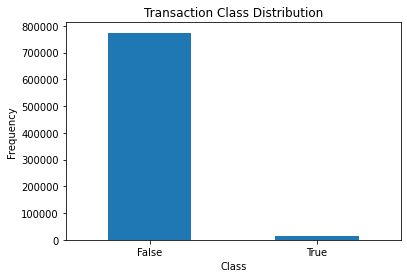

In [ ]:
isfraud_char.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## Splitting data into Fraud and Normal

In [ ]:
normal = data[data['isFraud']==False]
fraud = data[data['isFraud']==True]

In [ ]:
print("Shape of Normal transactions: ", normal.shape)
print("Shape of Fraud transactions: ", fraud.shape)

Shape of Normal transactions:  (773946, 29)
Shape of Fraud transactions:  (12417, 29)


In [ ]:
columns_amt = ['Normal Transactions Amount', 'Fradulant Transactions Amount']
amt = pd.concat([normal.transactionAmount.describe(), fraud.transactionAmount.describe()], axis=1)
amt.columns = columns_amt
print(amt)

       Normal Transactions Amount  Fradulant Transactions Amount
count               773946.000000                   12417.000000
mean                   135.570249                     225.215905
std                    146.525305                     189.551393
min                      0.000000                       0.000000
25%                     33.190000                      86.000000
50%                     86.760000                     176.980000
75%                    189.390000                     311.460000
max                   2011.540000                    1608.350000


## Visualisation of Normal and Fraudulant transactions

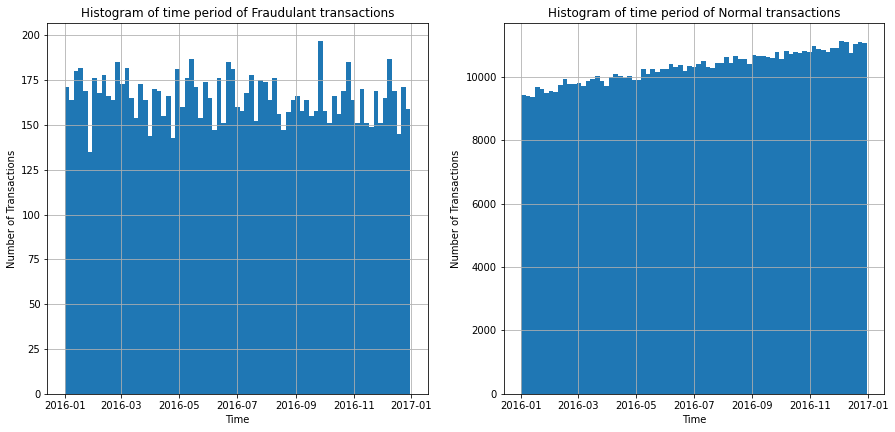

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
fraud.transactionDateTime.hist(bins=75,label="Fraudulant Transaction")
plt.title('Histogram of time period of Fraudulant transactions')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')

plt.subplot(2, 2, 2)
normal.transactionDateTime.hist(bins=75, label="Non Fraudulant Transaction")
plt.title('Histogram of time period of Normal transactions')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')

plt.show()

The fraudulant transactions here are occuring throughout the timeline and there is no set pattern. However, we see increasing trend of transactions which are normal over time

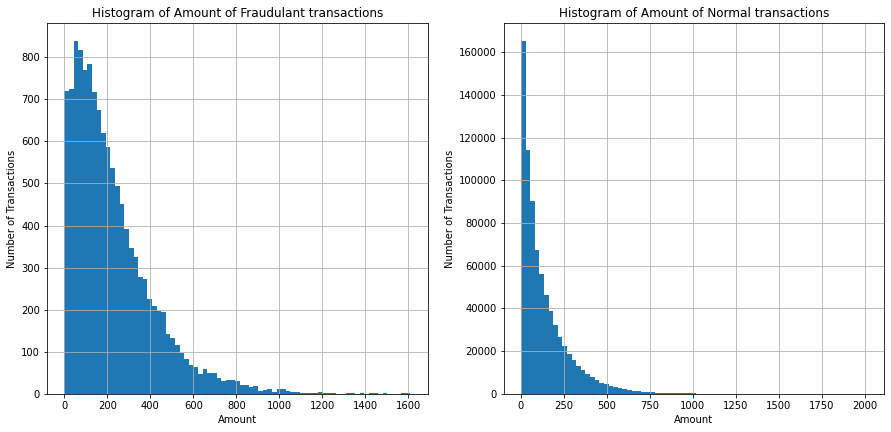

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
fraud.transactionAmount.hist(bins=75,label="Fraudulant Transaction")
plt.title('Histogram of Amount of Fraudulant transactions')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

plt.subplot(2, 2, 2)
normal.transactionAmount.hist(bins=75, label="Non Fraudulant Transaction")
plt.title('Histogram of Amount of Normal transactions')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

plt.show()

In [ ]:
print("Standard deviation of fraudulant transactions: ", fraud['transactionAmount'].std())
print("Standard deviation of normal transactions: ", normal['transactionAmount'].std())

Standard deviation of fraudulant transactions:  189.5513932254675
Standard deviation of normal transactions:  146.5253051567536


The histogram of the amount of transactions for normal and fradulant are right skewed, however, the tail of fraudulant transactions get flatter over a period of time (indicating a larger standard deviation) whereas for normal transactions, the spread is limited, and hence lesser standard deviation, which is also apparent from the values calculated above.

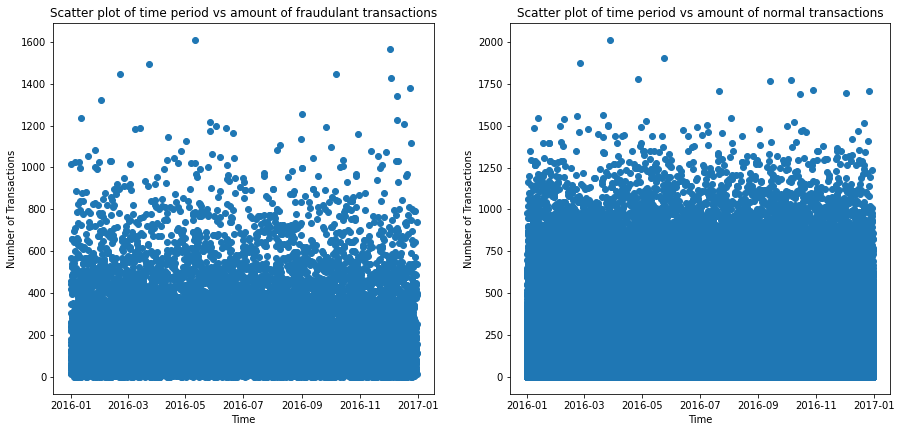

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.scatter(fraud.transactionDateTime, fraud.transactionAmount)
plt.title('Scatter plot of time period vs amount of fraudulant transactions')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')

plt.subplot(2, 2, 2)
plt.scatter(normal.transactionDateTime, normal.transactionAmount)
plt.title('Scatter plot of time period vs amount of normal transactions')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')



plt.show()

In this plot too, there is not much that we can gain from them. Both kinds of transactions happen consistently over the period of time ranging for most of the values, however, the maximum values of both the data types are different (as shown in the amt dataframe)

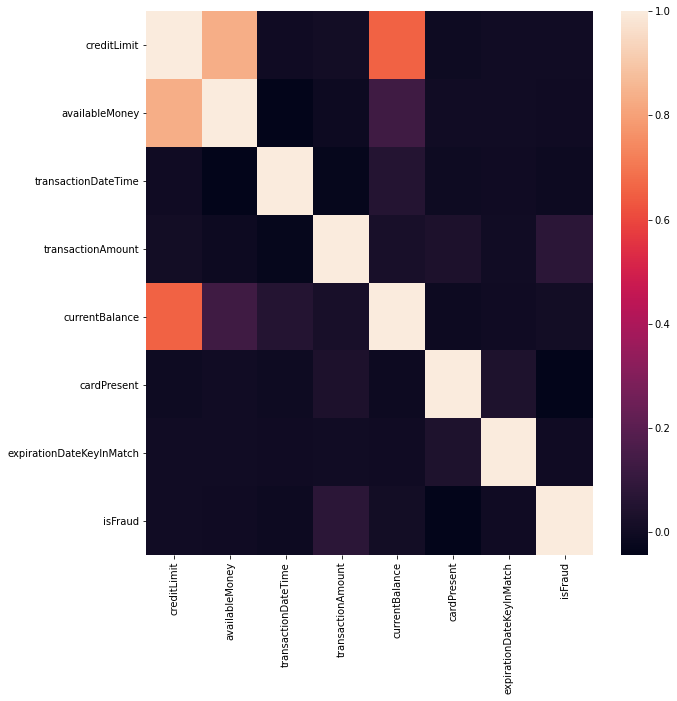

In [ ]:
df = data
df.transactionDateTime=pd.to_numeric(df.transactionDateTime)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show();

High Correlation between 

*   "creditLimit" and "availableMoney" 
*   "creditLimit" and "currentBalance"



## Building the data for the model

Here, we normalise the numerical datasets. The boolean datasets are already normalised (values between 0 and 1). We convert them from "bool" type to "int" type. We discard the non-numerical columns because there is no correlation and the meaning of those datapoints are more related to the user, like card number, cvv number, account number. The numerical and boolean points contain features like credit amount, amount of transaction, balance, etc. which have better chances of predicting whether a transaction is normal or fraudulant. 

After normalising, we separate the data into 'X' and 'y' where 'y' is the column 'isFraud' and 'X' is the set of other numerical and boolean columns.

In [ ]:
df['transactionAmount'] = StandardScaler().fit_transform(df['transactionAmount'].values.reshape(-1, 1))
for cols in float_cols:
    df[cols] = StandardScaler().fit_transform(df[cols].values.reshape(-1, 1))

df[bool_cols] = df[bool_cols]*1

df_ml = df[non_obj_cols]
X = df_ml.drop('isFraud', axis=1)
y = df_ml.isFraud

Since we observe class imbalance in the data, we have 2 options. First being over-sampling, which means we will increase the data points of less dominant class and make it equivalent to the dominant class. Here we do this by Synthetic Minority Oversampling Technique (SMOTE) under the imblearn library which works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

We see here that the samples are almost doubled and we have equal number of "normal" and "fraduluant" transactions.

In [ ]:
X_resample_os, y_resample_os = SMOTE().fit_sample(X, y)
print ('The number of transactions before resampling : ' + str(len(X)))
print ('The number of transactions after resampling : ' + str(len(X_resample_os)))
print ('If the number of frauds is equal to the number of normal tansactions? ' + str(sum(y_resample_os == 0) == sum(y_resample_os == 1)))

The number of transactions before resampling : 786363
The number of transactions after resampling : 1547892
If the number of frauds is equal to the number of normal tansactions? True


Another technique, we can employ here is using undersampling, which essentially means toning down the dominant class to bring it's samples equal to the number of samples in the less dominant class. This will reduce the overall number of datapoints that we want to consider for training the model as evident in the following function below. 

We make use of RandomUnderSampler() function under the imblearn library which is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.


In [ ]:
X_resample_us, y_resample_us = RandomUnderSampler().fit_resample(X, y)
print ('The number of transactions before resampling : ' + str(len(X)))
print ('The number of transactions after resampling : ' + str(len(X_resample_us)))
print ('If the number of frauds is equal to the number of normal tansactions? ' + str(sum(y_resample_us == 0) == sum(y_resample_us == 1)))

The number of transactions before resampling : 786363
The number of transactions after resampling : 24834
If the number of frauds is equal to the number of normal tansactions? True


Now that we have our resampled datapoints, we will build models and train/test them on both, the oversampled and undersampled data points.

### Splitting the dataset into test and train

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_resample_os, y_resample_os, test_size=0.2)


In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_resample_us, y_resample_us, test_size=0.2)

In [ ]:
print("Oversampling case: ")
print("Number of training samples: ", len(X_train_os))
print("Number of testing samples: ", len(X_test_os))
print("*************************************************")
print("Undersampling case: ")
print("Number of training samples: ", len(X_train_us))
print("Number of testing samples: ", len(X_test_us))

Oversampling case: 
Number of training samples:  1238313
Number of testing samples:  309579
*************************************************
Undersampling case: 
Number of training samples:  19867
Number of testing samples:  4967


## Defining the number of models to be used

We are using the following algorithms for our modelling: 

1.   **Logistic Regression** : Logistic Regression is the most basic binary classification algorithm and hence, we must compare its performance with other algorithms.
2.   **Decision Trees** : It is a flowchart like structure for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions. Hence, we attempt to use this algorithm to see if this structure is suited for out task. 
3.   **Gaussian Naive Bayes** : Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, with strongest assumption of independence between features which is unlikely in real data, yet the approach performs surprisingly well on data where this assumption does not hold. Hence, we try to make use of this approach in our problem. Also, due to the assumption of independence, it is faster to train. 
4.   **Random Forest** : The fundamental concept of random forests is "wisdom of crowds". Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. Uncorrelated models (trees) can produce ensemble predictions that are more accurate than any of the individual predictions. Hence, since we make use of decision trees, we also consider this approach for classifying our problem.
5.   **Quadratic discriminant analysis** : A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. This is good for bringinig in non-linearity into the function and is more stable than Logistic Regression. The model fits a Gaussian density to each class.
6.   **Neural Network (MLP)** : The most basic neural network, single layer. This is our attempt to try to use neural network to this problem.
7.   **Deep Neural Network**: While MLP is a single layer network, we try to go further deep in order to explore how much better performance we can achieve with Deep network. We train for 2 epochs to save time.
---

The metric we use for evaluating the performance of the algorithm would be area under the curve because accuracy can be misleading in such imbalanced datasets. 


1.   **Area Under the curve (AUC)**: represents likelihood of model distinguishing observations from two classes.
2.   **Precision**: It is the number of true positives divided by all positive predictions. It is also called positive predictive value and is a measure of classifier's exactness. Low precision value indicates high number of false positives.





### Machine Learning Algorithms

In [ ]:
MLA = [
    linear_model.LogisticRegressionCV(cv=5),
    naive_bayes.GaussianNB(),
    tree.DecisionTreeClassifier(max_depth=5),
    ensemble.RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    neural_network.MLPClassifier()
]



In [ ]:
def conv2binary(y_pred_model):
    # convert sigmoid continuous values to binary values
    y_pred = []
    for y in y_pred_model:
        if y > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

def build_model():
    #define the layers of model
    model = Sequential()
    model.add(Dense(20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def deeplearning_model(X_train, y_train, X_test, y_test):
    model = build_model()
    model.fit(X_train_os, y_train_os, epochs=2, batch_size=1000)

    y_pred_model = model.predict(X_test_os).ravel()
    y_pred = conv2binary(y_pred_model)

    fpr_model, tpr_model, thresholds_model = roc_curve(y_test_os, y_pred_model)
    auc_model = auc(fpr_model, tpr_model)
    precision_model = (precision_score(y_test_os, y_pred))
    accuracy_model = accuracy_score(y_test_os, y_pred)

    return "Deep learning model", precision_model, accuracy_model, auc_model

### Training and testing for the oversampled dataset

In [ ]:
MLA_columns = []
MLA_compare_os = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    
    predicted_os = alg.fit(X_train_os, y_train_os).predict(X_test_os)
    fp, tp, th = roc_curve(y_test_os, predicted_os)
    MLA_name = alg.__class__.__name__
    MLA_compare_os.loc[row_index,'MLA Name for Oversampled Data'] = MLA_name
    MLA_compare_os.loc[row_index, 'Precision'] = precision_score(y_test_os, predicted_os)
    MLA_compare_os.loc[row_index, 'Accuracy'] = accuracy_score(y_test_os, predicted_os)
    MLA_compare_os.loc[row_index, 'AUC'] = auc(fp, tp)
    print("Algorithm: ", MLA_name, "done!")
    row_index+=1

MLA_name_dl, precision_dl, accuracy_dl, auc_dl = deeplearning_model(X_train_os, y_train_os, X_test_os, y_test_os)
MLA_compare_os.loc[row_index, 'MLA Name for Oversampled Data'] = MLA_name_dl
MLA_compare_os.loc[row_index, 'Precision'] = precision_dl
MLA_compare_os.loc[row_index, 'Accuracy'] = accuracy_dl
MLA_compare_os.loc[row_index, 'AUC'] = auc_dl

MLA_compare_os.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare_os

Algorithm:  LogisticRegressionCV done!
Algorithm:  GaussianNB done!
Algorithm:  DecisionTreeClassifier done!
Algorithm:  RandomForestClassifier done!
Algorithm:  QuadraticDiscriminantAnalysis done!
Algorithm:  MLPClassifier done!
Epoch 1/2
1239/1239 [==============================] - 2s 2ms/step - loss: 0.6298 - accuracy: 0.6488
Epoch 2/2
1239/1239 [==============================] - 2s 2ms/step - loss: 0.6256 - accuracy: 0.6535


,MLA Name for Oversampled Data,Precision,Accuracy,AUC
6,Deep learning model,0.649738,0.655519,0.710443
5,MLPClassifier,0.655597,0.658821,0.658832
2,DecisionTreeClassifier,0.648421,0.656427,0.656462
3,RandomForestClassifier,0.678184,0.654014,0.653917
0,LogisticRegressionCV,0.664629,0.649262,0.649195
1,GaussianNB,0.560434,0.585640,0.585923
4,QuadraticDiscriminantAnalysis,0.762407,0.519005,0.518357


### Training and Testing for the undersampled dataset 

In [ ]:
MLA_columns = []
MLA_compare_us = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted_us = alg.fit(X_train_us, y_train_us).predict(X_test_us)
    fp, tp, th = roc_curve(y_test_us, predicted_us)
    MLA_name = alg.__class__.__name__
    MLA_compare_us.loc[row_index,'MLA Name for Undersampled Data'] = MLA_name
    MLA_compare_us.loc[row_index, 'Precision'] = precision_score(y_test_us, predicted_us)
    MLA_compare_us.loc[row_index, 'Accuracy'] = accuracy_score(y_test_us, predicted_us)
    MLA_compare_us.loc[row_index, 'AUC'] = auc(fp, tp)
    print("Algorithm: ", MLA_name, "done!")
    row_index+=1
MLA_name_dl, precision_dl, accuracy_dl, auc_dl = deeplearning_model(X_train_us, y_train_us, X_test_us, y_test_us)
MLA_compare_us.loc[row_index, 'MLA Name for Undersampled Data'] = MLA_name_dl
MLA_compare_us.loc[row_index, 'Precision'] = precision_dl
MLA_compare_us.loc[row_index, 'Accuracy'] = accuracy_dl
MLA_compare_us.loc[row_index, 'AUC'] = auc_dl
MLA_compare_us.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare_us

Algorithm:  LogisticRegressionCV done!
Algorithm:  GaussianNB done!
Algorithm:  DecisionTreeClassifier done!
Algorithm:  RandomForestClassifier done!
Algorithm:  QuadraticDiscriminantAnalysis done!
Algorithm:  MLPClassifier done!
Epoch 1/2
1239/1239 [==============================] - 3s 2ms/step - loss: 0.6299 - accuracy: 0.6486
Epoch 2/2
1239/1239 [==============================] - 2s 2ms/step - loss: 0.6253 - accuracy: 0.6531


,MLA Name for Undersampled Data,Precision,Accuracy,AUC
6,Deep learning model,0.653334,0.654492,0.710281
5,MLPClassifier,0.672087,0.646467,0.647249
2,DecisionTreeClassifier,0.652922,0.646869,0.646857
3,RandomForestClassifier,0.666365,0.641232,0.642019
0,LogisticRegressionCV,0.663505,0.638816,0.639597
4,QuadraticDiscriminantAnalysis,0.590997,0.607006,0.605274
1,GaussianNB,0.570891,0.591705,0.589003


In [ ]:
print(MLA_compare_os)
print(MLA_compare_us)

   MLA Name for Oversampled Data  Precision  Accuracy       AUC
6            Deep learning model   0.649738  0.655519  0.710443
5                  MLPClassifier   0.655597  0.658821  0.658832
2         DecisionTreeClassifier   0.648421  0.656427  0.656462
3         RandomForestClassifier   0.678184  0.654014  0.653917
0           LogisticRegressionCV   0.664629  0.649262  0.649195
1                     GaussianNB   0.560434  0.585640  0.585923
4  QuadraticDiscriminantAnalysis   0.762407  0.519005  0.518357
  MLA Name for Undersampled Data  Precision  Accuracy       AUC
6            Deep learning model   0.653334  0.654492  0.710281
5                  MLPClassifier   0.672087  0.646467  0.647249
2         DecisionTreeClassifier   0.652922  0.646869  0.646857
3         RandomForestClassifier   0.666365  0.641232  0.642019
0           LogisticRegressionCV   0.663505  0.638816  0.639597
4  QuadraticDiscriminantAnalysis   0.590997  0.607006  0.605274
1                     GaussianNB   0.570

# Conclusion

In order to deal with class imbalance problems, we have to make sure that we consider data from all classes equally. However, there can be problems that we might run into and this can lead to poor performances.


---

One of the major disadvantages of using under-sampling is that it can discard potentially useful information which can be useful in building classifiers. Also, it might be the case that the samples chosen in undersampling might not represent the population accurately and hence might fail on test dataset. Despite all this, it can train faster and give a quick glance into the prediction performance of the model/algorithms which can be used to build upon more complex algorithms.

---

On the other hand, over-sampling does not lead to information loss, and it can outperform under-sampling, which we see in the results. However, because the information is repeated, there is a chance of overfitting.

# Future tasks






Given more time, I would like to explore more techniques of over-sampling and under-sampling and work with them to evaluate the models better. I would have wanted to use "Tomek links" technique for undersampling, though it does not reduce the majority class samples significantly but it helps in bringing number of samples at par for all the classes. Also, I would have wanted to evaluate the performance of "NearMiss" under-sampling technique. 

For training the models, I would have wanted to use adaptive learning rate for neural networks with SGD and also a penalty factor for mistakes on classifying the minority class. It would have been a good exercise to perform grid search to get the best hyperparameters for all the algorithms.

Also, there are different other algorithms that can be tried for the given problem and I would have loved to use them from both classical AI and deep learning. 
From deep learning , we used deeper fully connected networks to increase the complexity of the model which infact performs the best. We could introduce dropout to increase the generalisation power of the network. We could also use CNNs because they are able to capture most important representations from a dataset. If there is some sequential relationship that is underlying the dataset, we could make use of RNNs as well.